## Comparison of Estimators
- MMSE estimator
- MAP estimator
- ML estimator

### Summary of Previous Results

**Problem Statement**

In this example, based on [B2, Ex 10.7], we want to find the estimate $\hat{\boldsymbol{\mu}}$ of the unknown random  mean $\boldsymbol{\mu}$, using the set of observations $\mathbf{y}_1, \ldots, \mathbf{y}_m$. 

Assume further that the observations are statistically independent, normal random variables, each with unknown mean $\boldsymbol{\mu}$ and known variance $\sigma^2$. 

The conditional pdf $p(\vec{y}|\mu)$ is then

$$
p(\vec{y}|\mu) = \frac{1}{(2\pi \sigma^2)^{m/2}} \exp\left(-\frac{1}{2\sigma^2} \sum_{k=1}^{m} (y_k - \mu)^2\right)
$$

Next, assume that the *a priori* pdf $p(\mu)$ is normal with mean $m_1$ and variance $\beta^2$, i.e.,

$$
p(\mu) = \frac{1}{\sqrt{2\pi \beta^2}} \exp\left(-\frac{(\mu - m_1)^2}{2\beta^2}\right)
$$

Note that the prior $ p(\mu) $ represents our knowledge about $\mu$ before observing any data.

The MMSE, MAP, and ML estimates are, respectively:

$$
\begin{align*}
\hat{\boldsymbol{\mu}}_{\text{MMSE}} &= \frac{\beta^2 \bar{\mathbf{y}} + m_1 \sigma^2 / m}{\beta^2 + \sigma^2 / m} \\
\hat{\boldsymbol{\mu}}_{\text{MAP}} &= \frac{m \beta^2 \bar{\mathbf{y}} + m_1 \sigma^2}{m \beta^2 + \sigma^2}  = \hat{\boldsymbol{\mu}}_{\text{MMSE}} \\
\hat{\boldsymbol{\mu}}_{\text{ML}} &= \bar{\mathbf{y}}
\end{align*}
$$

Comparison of Estimators of Parameters

- The first two estimates, $\hat{\boldsymbol{\mu}}_{\text{MMSE}}$ and $\hat{\boldsymbol{\mu}}_{\text{MAP}}$, are described as identical and biased.
- The third estimate, $\hat{\boldsymbol{\mu}}_{\text{ML}}$, is unbiased and efficient.
- For large sample sizes $ m $ or large $ \beta^2 $, it is noted that $ \hat{\boldsymbol{\mu}}_{\text{MMSE}} (= \hat{\boldsymbol{\mu}}_{\text{MAP}}) \approx \bar{\mathbf{y}} = \hat{\boldsymbol{\mu}}_{\text{ML}} $ are approximately equal.
- *Large* $ \beta^2 $ corresponds to an a priori probability density function (pdf) with a *wide dispersion*, meaning that little statistical information is gained from the prior knowledge.
- In this case, the MMSE and MAP estimates reduce to the ML estimate, which *does not require* an a priori pdf.


Trial 1:
True μ: 0.8193
Observations (vector y): [ 2.1743,  0.905 ,  1.6846,  0.0631,  1.1597,  1.6086,  2.9175, -0.4643,
 -0.7197,  0.1486]
Statistic (sample mean ȳ): 0.9477
MLE Estimate: 0.9477
MAP Estimate: 0.4739
MMSE Estimate: 0.4739

Trial 2:
True μ: 1.1935
Observations (vector y): [-0.379 ,  3.1874, -0.6197,  1.6783,  0.7355, -0.5886,  2.1176,  1.289 ,
  0.8837,  1.7972]
Statistic (sample mean ȳ): 1.0101
MLE Estimate: 1.0101
MAP Estimate: 0.5051
MMSE Estimate: 0.5051

Trial 3:
True μ: 1.1528
Observations (vector y): [ 2.6225,  0.9805, -0.1892,  2.4647,  0.8227,  1.5908,  0.3552,  2.4536,
  1.2346,  1.0021]
Statistic (sample mean ȳ): 1.3337
MLE Estimate: 1.3337
MAP Estimate: 0.6669
MMSE Estimate: 0.6669

Trial 4:
True μ: -0.6195
Observations (vector y): [-0.7227, -0.795 , -1.567 , -1.3811, -1.4331, -2.0088,  0.9924,  1.7117,
  1.1856, -2.1459]
Statistic (sample mean ȳ): -0.6164
MLE Estimate: -0.6164
MAP Estimate: -0.3082
MMSE Estimate: -0.3082

Trial 5:
True μ: 0.4501
Observa

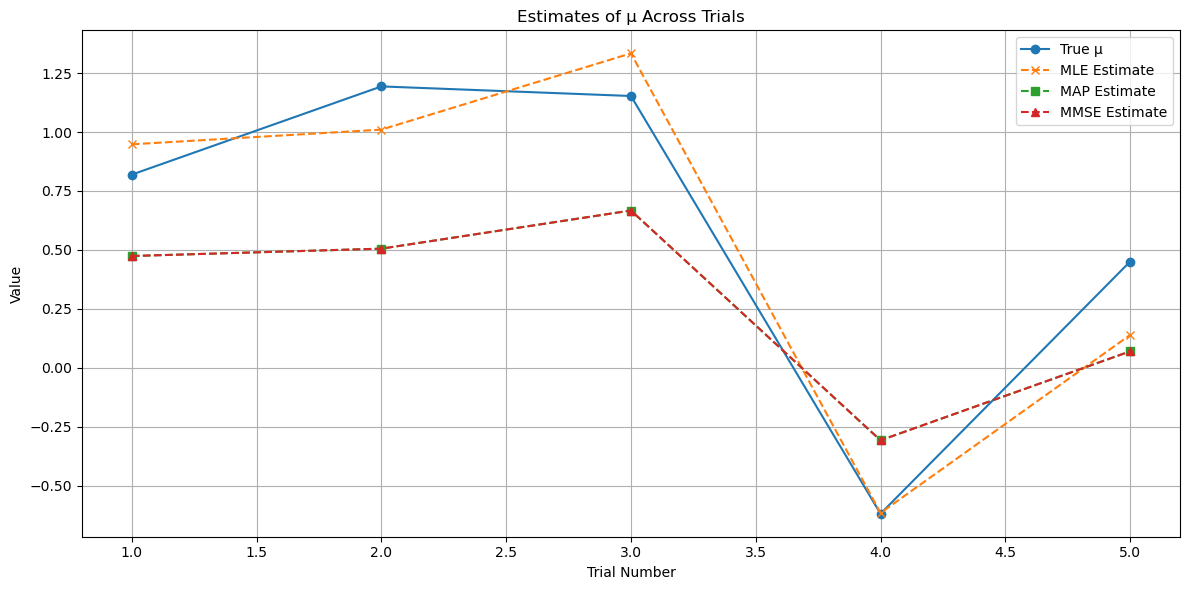


Estimation Errors:
 Trial  MLE_Error  MAP_Error  MMSE_Error
     1   0.128441  -0.345429   -0.345429
     2  -0.183338  -0.688404   -0.688404
     3   0.180936  -0.485934   -0.485934
     4   0.003140   0.311334    0.311334
     5  -0.311499  -0.380825   -0.380825


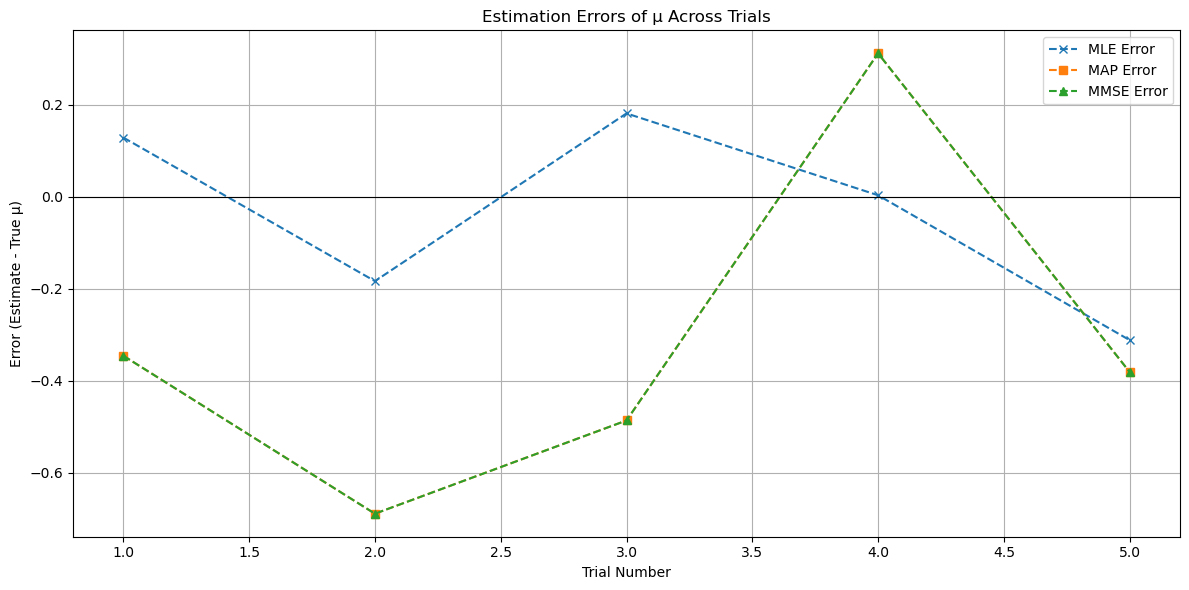

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set random seed for reproducibility (optional)
# np.random.seed(42)

# Parameters
m1 = 0.0        # Prior mean of mu
beta = 1.0      # Prior standard deviation of mu
sigma = 1.0     # Known standard deviation of observations
m = 10          # Number of observations per trial
k = 5          # Number of trials

# To store results
results = {
    'Trial': [],
    'True_mu': [],
    'Observations': [],
    'Sample_mean_y_bar': [],
    'MLE': [],
    'MAP': [],
    'MMSE': []
}

for trial in range(1, k + 1):
    # 1. Generate true mu based on prior
    true_mu = np.random.normal(m1, beta)
    
    # 2. Generate observations based on true mu
    observations = np.random.normal(true_mu, sigma, m)
    y_bar = np.mean(observations)
    
    # 3. Compute estimates
    # MLE: Sample mean
    mle = y_bar
    
    # MAP: (beta^2 * y_bar + sigma^2 * m1) / (beta^2 + sigma^2)
    map_estimate = (beta**2 * y_bar + sigma**2 * m1) / (beta**2 + sigma**2)
    
    # MMSE: Same as MAP in Gaussian case
    mmse = map_estimate
    
    # 4. Store the results
    results['Trial'].append(trial)
    results['True_mu'].append(true_mu)
    results['Observations'].append(observations)
    results['Sample_mean_y_bar'].append(y_bar)
    results['MLE'].append(mle)
    results['MAP'].append(map_estimate)
    results['MMSE'].append(mmse)
    
    # 5. Print the results for the current trial
    observations_str = np.array2string(observations, precision=4, separator=', ', suppress_small=True)
    print(f"Trial {trial}:")
    print(f"True μ: {true_mu:.4f}")
    print(f"Observations (vector y): {observations_str}")
    print(f"Statistic (sample mean ȳ): {y_bar:.4f}")
    print(f"MLE Estimate: {mle:.4f}")
    print(f"MAP Estimate: {map_estimate:.4f}")
    print(f"MMSE Estimate: {mmse:.4f}\n")

# Convert results to a DataFrame for better visualization
# Since 'Observations' is an array, we'll keep it as is or process separately if needed
df_results = pd.DataFrame({
    'Trial': results['Trial'],
    'True_mu': results['True_mu'],
    'Sample_mean_y_bar': results['Sample_mean_y_bar'],
    'MLE': results['MLE'],
    'MAP': results['MAP'],
    'MMSE': results['MMSE']
})

# Display the results table
print("Summary of Results:")
print(df_results.to_string(index=False))

# Visualization: Compare estimates with true mu across trials
plt.figure(figsize=(12, 6))
plt.plot(df_results['Trial'], df_results['True_mu'], marker='o', label='True μ')
plt.plot(df_results['Trial'], df_results['MLE'], marker='x', linestyle='--', label='MLE Estimate')
plt.plot(df_results['Trial'], df_results['MAP'], marker='s', linestyle='--', label='MAP Estimate')
plt.plot(df_results['Trial'], df_results['MMSE'], marker='^', linestyle='--', label='MMSE Estimate')
plt.title('Estimates of μ Across Trials')
plt.xlabel('Trial Number')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Compute and display estimation errors
df_results['MLE_Error'] = df_results['MLE'] - df_results['True_mu']
df_results['MAP_Error'] = df_results['MAP'] - df_results['True_mu']
df_results['MMSE_Error'] = df_results['MMSE'] - df_results['True_mu']

print("\nEstimation Errors:")
print(df_results[['Trial', 'MLE_Error', 'MAP_Error', 'MMSE_Error']].to_string(index=False))

# Optional: Plot estimation errors
plt.figure(figsize=(12, 6))
plt.plot(df_results['Trial'], df_results['MLE_Error'], marker='x', linestyle='--', label='MLE Error')
plt.plot(df_results['Trial'], df_results['MAP_Error'], marker='s', linestyle='--', label='MAP Error')
plt.plot(df_results['Trial'], df_results['MMSE_Error'], marker='^', linestyle='--', label='MMSE Error')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Estimation Errors of μ Across Trials')
plt.xlabel('Trial Number')
plt.ylabel('Error (Estimate - True μ)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Example: Signal Reception in Noise

In this example, based on [B2, Ex 10.20], we consider the reception of a signal embedded in noise, a common scenario in communications theory.

**Problem Statement** 

We have $ L $ independent observations (or received-signal samples) $ \mathbf{y}_i $, which are expressed as the sum of a random signal $ \mathbf{s} $ and noise samples $ \mathbf{n}_i $:

$$
\mathbf{y}_i = \mathbf{s} + \mathbf{n}_i, \quad i = 1, 2, \dots, L
$$
  
**Assumptions and PDFs**

The random signal $ \mathbf{s} $ is *uniformly distributed* in the interval $ (0, a) $.

The pdf of the signal $ s $ is given by:

$$
p_{\mathbf{s}} (s) = 
\begin{cases} 
\frac{1}{a}, & 0 < s < a \\
0, & \text{otherwise}
\end{cases}
$$

The random noise $ \mathbf{n}_i $ is Gaussian with *zero mean* and *variance* $ \sigma^2 $.

The pdf of the noise $ \mathbf{n}_i $ is:

$$
p_{\mathbf{n}_i} (n_i) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{n_i^2}{2\sigma^2} \right)
$$
  
**Conditional Distribution of $ \mathbf{y}_i $ given $ s $**

For a constant $ s $, $ \mathbf{y}_i $ is Gaussian with mean $ s $ and variance $ \sigma^2 $. 

Thus, the pdf $ p(\vec{y} | s) $ can be written as:

$$
p(\vec{y} | s) = \frac{1}{(2\pi \sigma^2)^{L/2}} \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^{L} (y_i - s)^2 \right)
$$

**Task**

We want to estimate the random $\mathbf{s}$.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 1          # Upper bound for the true signal
sigma = 1    # Standard deviation of the noise
L = 10         # Number of observations per trial
k = 5          # Number of trials

# To store signals and observations for analysis
signals = []
observations = []

for trial in range(1, k + 1):
    # Generate a random true signal within (0, a)
    signal = np.random.uniform(0, a)
    
    # Generate Gaussian noise
    noise = np.random.normal(0, sigma, L)
    
    # Generate observations by adding noise to the signal
    y = signal + noise
    
    # Store the results
    signals.append(signal)
    observations.append(y)
    
    # Display the results for the current trial
    print(f"Trial {trial}:")
    print(f"True Signal (fixed parameter s): {signal:.4f}")
    print(f"Observations (vector y): {y}\n")


Trial 1:
True Signal (fixed parameter s): 0.4516
Observations (vector y): [ 1.32064602 -0.5077289  -0.66214343  1.44271647 -0.82477021  1.81397064
 -0.80037337 -0.19763709  0.37709459  0.27959563]

Trial 2:
True Signal (fixed parameter s): 0.2683
Observations (vector y): [-0.52152635  0.38722607  0.35052791  1.02839825  1.951469   -0.62050193
  0.63186598 -0.77860689  1.50367162 -0.24161981]

Trial 3:
True Signal (fixed parameter s): 0.1999
Observations (vector y): [ 1.43114502 -1.42366952 -0.05386208  0.39046     0.04691115  1.44249959
 -1.57316783  0.05206321  0.56235636  0.17916296]

Trial 4:
True Signal (fixed parameter s): 0.3236
Observations (vector y): [-1.7656375   1.89771449 -0.05695857  0.94111807  2.5332734  -0.54548923
 -0.80319628 -0.61812149  0.46580735 -0.09023442]

Trial 5:
True Signal (fixed parameter s): 0.0654
Observations (vector y): [ 0.00732296  0.30873143 -1.37173128  1.80500289 -0.22437932 -0.70756438
  0.8684864   1.24873887  0.26297671  1.87421202]



### Method 1: Maximum Likelihood Estimate 

Recall that the Maximum Likelihood Estimator seeks the value of $ s $ that **maximizes the likelihood** of the observed data $ \vec{y} = (y_1, y_2, \dots, y_L) $.

Mathematically, the ML estimator is given by:

$$
\hat{s}_{\text{ML}} = \arg\max_{s} \, p(\vec{y} | s)
$$

Unlike MAP estimation, ML does **not** consider the prior distribution $ p(s) $.


#### Finding $ \hat{s}_{\text{ML}} $

We need to maximize the likelihood $ p(\vec{y} | s) $ with respect to $ s $.

Maximizing the likelihood is equivalent to maximizing the **log-likelihood** since the logarithm is a monotonically increasing function. 

The log-likelihood $ \mathcal{L}(s) $ is:

$$
\mathcal{L}(s) = \ln p(\vec{y} | s) = -\frac{L}{2} \ln(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{L} (y_i - s)^2
$$

To maximize $ \mathcal{L}(s) $, we can equivalently **minimize** the negative log-likelihood:

$$
\text{Minimize} \quad \sum_{i=1}^{L} (y_i - s)^2
$$

This is a **quadratic function** in $ s $, which is minimized when its derivative with respect to $ s $ is zero.


Compute the derivative of the sum of squared errors with respect to $ s $:

$$
\frac{d}{ds} \left( \sum_{i=1}^{L} (y_i - s)^2 \right) = -2 \sum_{i=1}^{L} (y_i - s)
$$

Set the derivative to zero for minimization:

$$
-2 \sum_{i=1}^{L} (y_i - s) = 0
$$

Simplifying:

$$
\sum_{i=1}^{L} y_i - L s = 0 \quad \Rightarrow \quad s = \frac{1}{L} \sum_{i=1}^{L} y_i = \bar{y}
$$

where $ \bar{y} $ is the sample mean of the observations.

The Maximum Likelihood Estimator for $ s $ is the sample mean of the observations:

$$
\boxed{ \hat{s}_{\text{ML}} = \bar{y} = \frac{1}{L} \sum_{i=1}^{L} y_i }
$$

In general

$$
\hat{\mathbf{s}}_{ML} = \bar{\mathbf{y}}
$$

where $ \bar{\mathbf{y}} $ is the sample mean.

Note that, unless explicitly stated, ML estimation typically assumes an **unconstrained parameter space**. 

### Method 2: Maximum A Posteriori Estimate (MAP)

The MAP estimator seeks the value of $ s $ that maximizes the posterior distribution $ p(s | \vec{y}) $, where $ \vec{y} = (y_1, y_2, \dots, y_L) $ represents all observations.

Mathematically, the MAP estimator is given by:

$$
\hat{s}_{\text{MAP}} = \arg\max_{s} \, p(s | \vec{y})
$$

By Bayes' theorem:

$$
p(s | \vec{y}) = \frac{p(\vec{y} | s) p(s)}{p(\vec{y})}
$$

Since $ p(\vec{y}) $ is constant with respect to $ s $, maximizing $ p(s | \vec{y}) $ is equivalent to maximizing the **product** of the **likelihood** $ p(\vec{y} | s) $ and the **prior** $ p(s) $:

$$
\hat{s}_{\text{MAP}} = \arg\max_{s} \, p(\vec{y} | s) p(s)
$$

Combining the likelihood and the prior, the MAP estimator maximizes:

$$
p(\vec{y} | s) p(s)
$$

Substituting the expressions:

$$
\hat{s}_{\text{MAP}} = \arg\max_{s} \left[ \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^L \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^{L} (y_i - s)^2 \right) \times 
\begin{cases} 
\frac{1}{a}, & 0 < s < a \\
0, & \text{otherwise}
\end{cases}
\right]
$$

Since $ \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^L $ and $ \frac{1}{a} $ are constants (when $ 0 < s < a $), maximizing the above expression reduces to minimizing the exponent term within the allowed range of $ s $:

$$
\hat{s}_{\text{MAP}} = \arg\min_{s \in (0, a)} \sum_{i=1}^{L} (y_i - s)^2
$$

#### Solving the differential equation

The expression to minimize is a **quadratic function** in $ s $:

$$
\sum_{i=1}^{L} (y_i - s)^2 = \sum_{i=1}^{L} y_i^2 - 2s \sum_{i=1}^{L} y_i + L s^2
$$

Taking the derivative with respect to $ s $ and setting it to zero to find the minimum:

$$
\frac{d}{ds} \left( \sum_{i=1}^{L} (y_i - s)^2 \right) = -2 \sum_{i=1}^{L} y_i + 2L s = 0
$$

Solving for $ s $:

$$
s = \frac{1}{L} \sum_{i=1}^{L} y_i = \bar{y}
$$

where $ \bar{y} $ is the sample mean of the observations.

The MAP estimator **must respect** the prior constraints $ 0 < s < a $. Therefore, the estimator is:

$$
\hat{s}_{\text{MAP}} = 
\begin{cases} 
0, & \text{if } \bar{y} \leq 0 \\
\bar{y}, & \text{if } 0 < \bar{y} < a \\
a, & \text{if } \bar{y} \geq a
\end{cases}
$$

This can be compactly written using the **clipping** (or **saturation**) function:

$$
\hat{s}_{\text{MAP}} = \min\left( a, \max\left( 0, \bar{y} \right) \right)
$$


Putting it all together, the MAP estimator for $ s $ is:

$$
\boxed{ \hat{s}_{\text{MAP}} = \min\left( a, \max\left( 0, \frac{1}{L} \sum_{i=1}^{L} y_i \right) \right) }
$$

### Method 3: Minimum Mean Squared Error (MMSE) Estimate

#### Problem Formulation

The **MMSE Estimator** seeks to minimize the **mean squared error** between the estimated signal $ \hat{s} $ and the true signal $ s $. Mathematically, it is defined as:

$$
\hat{s}_{\text{MMSE}} = \mathbb{E}[s | \vec{y}]
$$

Using Bayesian estimation, this expectation can be expressed as:

$$
\hat{s}_{\text{MMSE}} = \frac{\int_{-\infty}^{\infty} s \cdot p(\vec{y}|s) \cdot p(s) \, ds}{\int_{-\infty}^{\infty} p(\vec{y}|s) \cdot p(s) \, ds}
$$

Substituting the expressions for $ p(\vec{y}|s) $ and $ p(s) $ into the MMSE formula:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{-\infty}^{\infty} s \cdot p(\vec{y}|s) \cdot p(s) \, ds }{ \int_{-\infty}^{\infty} p(\vec{y}|s) \cdot p(s) \, ds }
$$

Given the support of $ p(s) $ is $ (0, a) $, the integrals simplify to:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{0}^{a} s \cdot p(\vec{y}|s) \cdot \frac{1}{a} \, ds }{ \int_{0}^{a} p(\vec{y}|s) \cdot \frac{1}{a} \, ds }
$$

Since $ \frac{1}{a} $ is a constant, it cancels out in the numerator and denominator:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{0}^{a} s \cdot p(\vec{y}|s) \, ds }{ \int_{0}^{a} p(\vec{y}|s) \, ds }
$$

Notice that:

$$
\sum_{i=1}^{L} (y_i - s)^2 = \sum_{i=1}^{L} (y_i - \bar{y} + \bar{y} - s)^2 = \sum_{i=1}^{L} (y_i - \bar{y})^2 + L (\bar{y} - s)^2
$$

where $ \bar{y} = \frac{1}{L} \sum_{i=1}^{L} y_i $ is the sample mean.

Thus, the joint likelihood becomes:

$$
p(\vec{y}|s) = \left( \frac{1}{\sqrt{2\pi \sigma^2}} \right)^L \exp\left( -\frac{1}{2\sigma^2} \sum_{i=1}^{L} (y_i - \bar{y})^2 \right) \exp\left( -\frac{L (\bar{y} - s)^2}{2\sigma^2} \right)
$$

The term $ \sum_{i=1}^{L} (y_i - \bar{y})^2 $ is **independent** of $ s $, so it acts as a constant in both the numerator and denominator and cancels out. Therefore:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{0}^{a} s \cdot \exp\left( -\frac{L (\bar{y} - s)^2}{2\sigma^2} \right) ds }{ \int_{0}^{a} \exp\left( -\frac{L (\bar{y} - s)^2}{2\sigma^2} \right) ds }
$$

#### Derivation of the MMSE Estimate

To evaluate the integrals, perform a change of variables to standardize the Gaussian exponent.

Let:

$$
z = \frac{ s - \bar{y} }{ \tau }, \quad \text{where } \tau = \frac{ \sigma }{ \sqrt{L} }
$$

Thus:

$$
s = \bar{y} + z \tau \quad \text{and} \quad ds = \tau \, dz
$$

Constraints from the prior probability $p(s)$:

- When $ s = 0 $:
  
  $$
  z_1 = \frac{ 0 - \bar{y} }{ \tau } = -\frac{ \bar{y} \sqrt{L} }{ \sigma }
  $$
  
- When $ s = a $:
  
  $$
  z_2 = \frac{ a - \bar{y} }{ \tau } = \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma }
  $$

Substituting into the integrals:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{z_1}^{z_2} (\bar{y} + z \tau) \exp\left( -\frac{z^2}{2} \right) \tau \, dz }{ \int_{z_1}^{z_2} \exp\left( -\frac{z^2}{2} \right) \tau \, dz }
$$

Simplifying, the $ \tau $ terms cancel out:

$$
\hat{s}_{\text{MMSE}} = \frac{ \int_{z_1}^{z_2} (\bar{y} + z \tau) \exp\left( -\frac{z^2}{2} \right) dz }{ \int_{z_1}^{z_2} \exp\left( -\frac{z^2}{2} \right) dz }
$$


Split the numerator:

$$
\int_{z_1}^{z_2} (\bar{y} + z \tau) e^{ -z^2 / 2 } dz = \bar{y} \int_{z_1}^{z_2} e^{ -z^2 / 2 } dz + \tau \int_{z_1}^{z_2} z e^{ -z^2 / 2 } dz
$$

For the first integral

$$
\int_{z_1}^{z_2} e^{ -z^2 / 2 } dz = \sqrt{2\pi} \left[ \Phi(z_2) - \Phi(z_1) \right]
$$

where $ \Phi(z) $ is the **standard normal cumulative distribution function (CDF)**, i.e., $\Phi(z) = 1- Q(z)$.

For the second integral

$$
\int_{z_1}^{z_2} z e^{ -z^2 / 2 } dz = -e^{ -z^2 / 2 } \Big|_{z_1}^{z_2} = e^{ -z_1^2 / 2 } - e^{ -z_2^2 / 2 }
$$

Thus, the numerator becomes:

$$
\bar{y} \cdot \sqrt{2\pi} \left[ \Phi(z_2) - \Phi(z_1) \right] + \tau \left[ e^{ -z_1^2 / 2 } - e^{ -z_2^2 / 2 } \right]
$$

And the denominator is:

$$
\sqrt{2\pi} \left[ \Phi(z_2) - \Phi(z_1) \right]
$$

Therefore, the MMSE estimator is:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \tau \left[ e^{ -z_1^2 / 2 } - e^{ -z_2^2 / 2 } \right] }{ \sqrt{2\pi} \left[ \Phi(z_2) - \Phi(z_1) \right] }
$$


Recall that:

$$
\tau = \frac{ \sigma }{ \sqrt{L} }, \quad z_1 = -\frac{ \bar{y} \sqrt{L} }{ \sigma }, \quad z_2 = \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma }
$$

Substituting these back:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \frac{ \sigma }{ \sqrt{L} } \left[ e^{ -\frac{ (\bar{y} \sqrt{L})^2 }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } \right] }{ \sqrt{2\pi} \left[ \Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) - \Phi\left( -\frac{ \bar{y} \sqrt{L} }{ \sigma } \right) \right] }
$$

Simplifying:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) - \Phi\left( -\frac{ \bar{y} \sqrt{L} }{ \sigma } \right) }
$$

**Note**: $ \Phi(-x) = 1 - \Phi(x) $, so:

$$
\Phi\left( -\frac{ \bar{y} \sqrt{L} }{ \sigma } \right) = 1 - \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right)
$$

Thus, the denominator can be rewritten as:

$$
\Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) - \left( 1 - \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right) \right) = \Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) + \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right) - 1
$$

Therefore, the MMSE estimator simplifies to:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) + \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right) - 1 }
$$

Alternatively, using the **error function** $ \text{erf}(x) $, which is related to the standard normal CDF $ \Phi(x) $ by:

$$
\Phi(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x}{\sqrt{2}} \right) \right]
$$

We can express the MMSE estimator as:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] + \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{ \bar{y} \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] - 1 }
$$

Simplifying the denominator:

$$
\begin{align*}
\Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) + \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right) - 1 &= \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] + \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{ \bar{y} \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] - 1
\\
&= \frac{1}{2} \text{erf}\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma \sqrt{2} } \right) + \frac{1}{2} \text{erf}\left( \frac{ \bar{y} \sqrt{L} }{ \sigma \sqrt{2} } \right)
\end{align*}
$$

Thus, the MMSE estimator becomes:

$$
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \frac{1}{2} \left[ \text{erf}\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma \sqrt{2} } \right) + \text{erf}\left( \frac{ \bar{y} \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] }
$$

This expression neatly encapsulates the MMSE estimator in terms of the sample mean $ \bar{y} $, the **error function**, and the system parameters $ a $, $ \sigma $, and $ L $.

**Summary: Expressions for the MMSE Estimator**

To present the MMSE estimator in a compact and interpretable form, we can express it as:

$$
\boxed{
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \Phi\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma } \right) + \Phi\left( \frac{ \bar{y} \sqrt{L} }{ \sigma } \right) - 1 }
}
$$

Alternatively, using the error function $ \text{erf}(x) $:

$$
\boxed{
\hat{s}_{\text{MMSE}} = \bar{y} + \frac{ \sigma }{ \sqrt{2\pi L} } \cdot \frac{ e^{ -\frac{ \bar{y}^2 L }{ 2 \sigma^2 } } - e^{ -\frac{ (a - \bar{y})^2 L }{ 2 \sigma^2 } } }{ \frac{1}{2} \left[ \text{erf}\left( \frac{ (a - \bar{y}) \sqrt{L} }{ \sigma \sqrt{2} } \right) + \text{erf}\left( \frac{ \bar{y} \sqrt{L} }{ \sigma \sqrt{2} } \right) \right] }
}
$$

where

- $ \bar{y} = \frac{1}{L} \sum_{i=1}^{L} y_i $ is the sample mean.
- $ \Phi(x) $ is the **standard normal CDF**.
- $ \text{erf}(x) $ is the **error function**, related to the standard normal CDF by:
  
  $$
  \Phi(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x}{\sqrt{2}} \right) \right]
  $$

#### Example Calculation

**Given**:
- $ L = 10 $ observations:
  
  $$
  \vec{y} = [2.0, 2.2, 1.8, 2.1, 2.3, 2.0, 2.1, 2.2, 1.9, 2.0]
  $$
  
- $ a = 3 $
- $ \sigma = 0.5 $

**Calculate the Sample Mean**:

$$
\bar{y} = \frac{2.0 + 2.2 + 1.8 + 2.1 + 2.3 + 2.0 + 2.1 + 2.2 + 1.9 + 2.0}{10} = 2.06
$$

**Compute the MMSE Estimator**:

Substitute the values into the MMSE estimator formula:

$$
\hat{s}_{\text{MMSE}} = 2.06 + \frac{0.5}{\sqrt{2\pi \times 10}} \cdot \frac{ e^{ -\frac{(2.06)^2 \times 10}{2 \times 0.5^2} } - e^{ -\frac{(3 - 2.06)^2 \times 10}{2 \times 0.5^2} } }{ \Phi\left( \frac{(3 - 2.06) \times \sqrt{10}}{0.5} \right) + \Phi\left( \frac{2.06 \times \sqrt{10}}{0.5} \right) - 1 }
$$

Calculating each component:

Exponentials
   
$$
\frac{(2.06)^2 \times 10}{2 \times 0.25} = 84.86 \quad \Rightarrow \quad e^{-84.86} \approx 0 \quad (\text{negligible})
$$

$$
\frac{(3 - 2.06)^2 \times 10}{2 \times 0.25} = 17.672 \quad \Rightarrow \quad e^{-17.672} \approx 2.10 \times 10^{-8}
$$

CDFs

$$
\frac{(3 - 2.06) \times \sqrt{10}}{0.5} \approx 5.95
$$

$$
\frac{2.06 \times \sqrt{10}}{0.5} \approx 13.04
$$

Thus:

$$
\Phi(5.95) \approx 1 \quad (\text{since 5.95 is far in the tail})
$$

$$
\Phi(13.04) \approx 1 \quad (\text{even more in the tail})
$$

Substituting Back

$$
\begin{align*}
\hat{s}_{\text{MMSE}} &= 2.06 + \frac{0.5}{\sqrt{2\pi \times 10}} \cdot \frac{ 0 - 2.10 \times 10^{-8} }{ 1 + 1 - 1 } \\
&\approx 2.06
\end{align*}
$$
   
Thus, we have

$$
\hat{s}_{\text{MMSE}} \approx 2.06 
$$

Since the sample mean $ \bar{y} = 2.06 $ lies well within the interval $ (0, 3) $, the MMSE estimator closely aligns (not identical, because this is an approximation) with the sample mean, as expected.

#### Biasness of MMSE

- **Bias**: The final expression shows that the MMSE estimate $ \hat{s}_{MS} $ is **biased**. This contrasts with the **ML** and **MAP** estimates, which are **unbiased**.
  
- The bias term (involving $ \bar{y} $) can be numerically evaluated to show how its bias is affected by a parameter defined in decibels (dB).
  
- The quality of the estimate depends on the parameter $ L / (2\sigma^2) $, which is expressed in decibels as:

$$
g_{dB} = 10 \log \left( \frac{L}{2 \sigma^2} \right)
$$


The MMSE estimator expressed as a function of $ g = \frac{L}{2\sigma^2} $ (linear) as

$$
\boxed{
\hat{s}_{\text{MMSE}} (g) = \bar{y} + \frac{1}{\sqrt{\pi g}} \cdot \frac{ e^{-g\bar{y}^2} - e^{-g(a - \bar{y})^2} }{ \text{erf}\left( (a - \bar{y}) \sqrt{g} \right) + \text{erf}\left( \bar{y} \sqrt{g} \right) }
}
$$

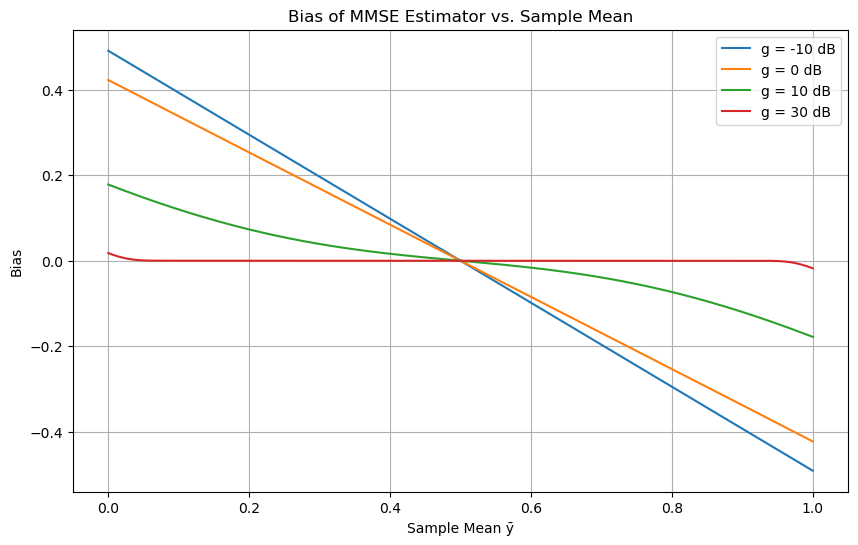

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Define the MMSE estimator function
def mmse_estimator(y_bar, g, a=1):
    numerator = np.exp(-g * y_bar**2) - np.exp(-g * (a - y_bar)**2)
    denominator = erf((a - y_bar) * np.sqrt(g)) + erf(y_bar * np.sqrt(g))
    # To handle division by zero, we add a small epsilon to the denominator
    epsilon = 1e-12
    denominator = np.where(denominator == 0, epsilon, denominator)
    estimator = y_bar + (1 / np.sqrt(np.pi * g)) * (numerator / denominator)
    return estimator

# Parameters
a = 1
y_bar = np.linspace(0, a, 1000)
g_dB_values = [-10, 0, 10, 30]
g_values = 10 ** (np.array(g_dB_values) / 10)

# Plotting
plt.figure(figsize=(10, 6))
for g_dB, g in zip(g_dB_values, g_values):
    estimator = mmse_estimator(y_bar, g, a)
    bias = estimator - y_bar
    plt.plot(y_bar, bias, label=f'g = {g_dB} dB')

plt.title('Bias of MMSE Estimator vs. Sample Mean')
plt.xlabel('Sample Mean ȳ')
plt.ylabel('Bias')
plt.legend()
plt.grid(True)
plt.show()


##### Schonhoff's Method

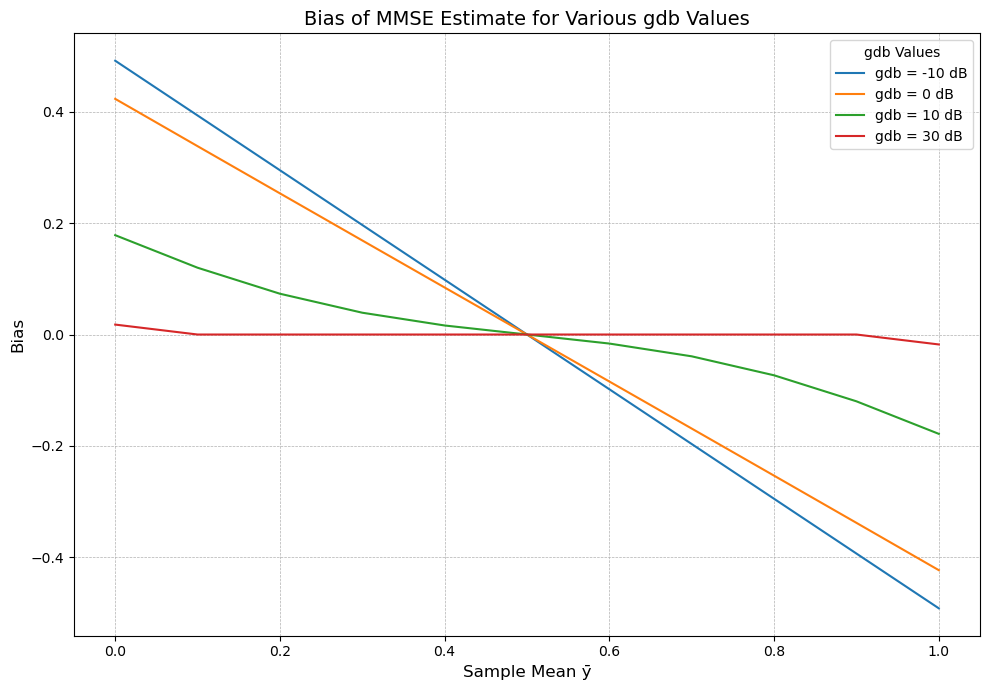

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bias(gdb):
    """
    Calculate the bias of the MMSE Estimate for a given gdb.

    Parameters:
        gdb (float): g in decibels, defined as 10 * log10(L / (2 * sigma^2))

    Returns:
        b (numpy.ndarray): Bias of the MMSE estimate for y ranging from 0 to 1 in steps of 0.1
    """
    # Convert gdb from decibels to linear scale
    g = 10**(0.1 * gdb)
    
    # Calculate coefficients
    coef = 1 / np.sqrt(np.pi * g)
    sig = 1 / np.sqrt(2 * g)
    
    # Initialize bias array
    b = np.zeros(11)
    
    # Calculate bias for y values from 0 to 1 in steps of 0.1
    for k in range(1, 12):
        y = (k - 1) * 0.1
        t1 = np.exp(-y**2 * g)
        t2 = np.exp(-(y - 1)**2 * g)
        
        if np.isclose(t1, t2):
            b[k-1] = 0
        else:
            td1 = norm.cdf(y, loc=0, scale=sig)
            td2 = norm.cdf(y, loc=1, scale=sig)
            denominator = 2 * (td1 - td2)
            
            # To avoid division by zero, check if denominator is not zero
            if not np.isclose(denominator, 0):
                b[k-1] = coef * (t1 - t2) / denominator
            else:
                b[k-1] = 0  # Assign zero or handle as needed
    
    return b

def plot_bias(gdb_values, y_range=(0, 1), step=0.1):
    """
    Plot the bias of the MMSE Estimate for multiple gdb values.

    Parameters:
        gdb_values (list or array-like): List of gdb values in decibels to plot
        y_range (tuple): The range of y values (start, end)
        step (float): Step size for y values
    """
    # Create y-axis values based on the specified range and step
    y_values = np.arange(y_range[0], y_range[1] + step, step)
    
    plt.figure(figsize=(10, 7))
    
    for gdb in gdb_values:
        bias_values = bias(gdb)
        plt.plot(y_values, bias_values, linestyle='-', label=f'gdb = {gdb} dB')
    
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('Sample Mean ȳ', fontsize=12)
    plt.ylabel('Bias', fontsize=12)
    plt.title('Bias of MMSE Estimate for Various gdb Values', fontsize=14)
    plt.legend(title='gdb Values', fontsize=10)
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Define multiple gdb values
    gdb_values = [-10, 0, 10, 30]  # You can add more values as needed
    
    # Plot bias for the specified gdb values
    plot_bias(gdb_values)


The bias decreases as $ g_{dB} $ increases, and as $ g_{dB} $ becomes large, the bias term approaches zero, meaning the MMSE estimate becomes closer to unbiased.

We can say that the larger the signal-to-noise ratio (expressed by $ g_{dB} $), the smaller the bias in the MMSE estimate.

#### Discussion

- **Data Integration**: The MMSE estimator $ \hat{s}_{\text{MMSE}} $ integrates both the **observed data** (through the sample mean $ \bar{y} $) and the **prior information** about $ s $ (uniformly distributed over $ (0, a) $). This ensures that the estimator not only fits the data but also adheres to the known constraints on $ s $.

- **Bias-Variance Trade-off**: Unlike the **Maximum Likelihood** estimator, which solely relies on data and can be biased when data suggests estimates outside $ (0, a) $, the MMSE estimator incorporates prior knowledge to potentially introduce bias that reduces the overall mean squared error.

- **Behavior Near Boundaries**:
  
  - **Central Estimates** ($ \bar{y} $ well within $ (0, a) $): The MMSE estimator closely aligns with the sample mean, similar to the ML estimator.
  
  - **Boundary Estimates** ($ \bar{y} $ near 0 or $ a $): The estimator adjusts the estimate to respect the prior constraints, preventing it from exceeding the bounds. This results in a smoother transition compared to the ML estimator, which might abruptly clip estimates.

### Simulation of 3 Methods

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
from scipy.special import erf

# Simulation Parameters
L = 10              # Number of observations
a = 3.0             # Upper bound for s
sigma = 2         # Noise standard deviation
num_trials = 1000  # Number of simulation trials

# Function to compute MMSE estimator via numerical integration
def mmse_estimator_numerical(y_bar, L, sigma, a):
    # Define the integrand for the numerator: s * exp(- (L/(2*sigma^2)) * (s - y_bar)^2)
    def numerator_integrand(s):
        return s * np.exp(- (L / (2 * sigma**2)) * (s - y_bar)**2)
    
    # Define the integrand for the denominator: exp(- (L/(2*sigma^2)) * (s - y_bar)^2)
    def denominator_integrand(s):
        return np.exp(- (L / (2 * sigma**2)) * (s - y_bar)**2)
    
    # Compute the integrals numerically
    numerator, _ = quad(numerator_integrand, 0, a, limit=100)
    denominator, _ = quad(denominator_integrand, 0, a, limit=100)
    
    # Avoid division by zero
    if denominator == 0:
        return 0
    else:
        return numerator / denominator

# Function to compute MMSE estimator via closed-form expression
def mmse_estimator_closed_form(y_bar, L, sigma, a):
    # Compute the exponent terms
    exponent1 = - (y_bar ** 2) * L / (2 * sigma ** 2)
    exponent2 = - ((a - y_bar) ** 2) * L / (2 * sigma ** 2)
    
    # Compute the numerator and denominator
    numerator = np.exp(exponent1) - np.exp(exponent2)
    
    # Compute the error functions
    erf1 = erf((a - y_bar) * np.sqrt(L) / (sigma * np.sqrt(2)))
    erf2 = erf(y_bar * np.sqrt(L) / (sigma * np.sqrt(2)))
    
    # Compute the denominator of the fraction inside the formula
    denominator = 0.5 * (erf1 + erf2)
    
    # Avoid division by zero
    if denominator == 0:
        adjustment = 0
    else:
        adjustment = (sigma / np.sqrt(2 * np.pi * L)) * (numerator / denominator)
    
    # Compute the closed-form MMSE estimator
    s_mmse_closed = y_bar + adjustment
    return s_mmse_closed

# Function to compute MAP estimator via theory
def map_estimator_closed_form(y_bar, a):
    return min(a, max(0, y_bar))

# Function to compute MAP estimator via numerical root-finding (generalized approach)
def map_estimator_numerical(y_bar, L, sigma, a):
    # Define the derivative of log p(s | y) with respect to s
    def derivative_log_posterior(s):
        # For uniform prior, p(s) is constant within [0, a]
        # So derivative is same as derivative of log p(y | s)
        # p(y | s) ~ exp(- (sum (y_i - s)^2)/(2 sigma^2))
        # derivative: d/ds log p(y | s) = sum (y_i - s) / sigma^2 = L (y_bar - s) / sigma^2
        return L * (y_bar - s) / (sigma ** 2)
    
    # Attempt to find the root within [0, a]
    # Given the derivative is linear in s, the root is at s = y_bar
    # Clamp the root to [0, a]
    s_root = y_bar
    s_root_clamped = min(a, max(0, s_root))
    return s_root_clamped

# Initialize arrays to store results
ml_estimates = np.zeros(num_trials)
map_estimates_closed_form = np.zeros(num_trials)
map_estimates_numerical = np.zeros(num_trials)
mmse_estimates_numerical = np.zeros(num_trials)
mmse_estimates_closed = np.zeros(num_trials)
true_signals = np.zeros(num_trials)

# Simulation Loop
for trial in range(num_trials):
    # Randomly choose a true signal s within (0, a)
    s = np.random.uniform(0, a)
    true_signals[trial] = s
    
    # Generate L observations with Gaussian noise
    y = s + np.random.normal(0, sigma, L)
    y_bar = np.mean(y)
    
    # ML Estimator
    s_ml = y_bar
    ml_estimates[trial] = s_ml
    
    # MAP Estimator via Closed-Form
    s_map_proj = map_estimator_closed_form(y_bar, a)
    map_estimates_closed_form[trial] = s_map_proj
    
    # MAP Estimator via Numerical Root-Finding
    s_map_num = map_estimator_numerical(y_bar, L, sigma, a)
    map_estimates_numerical[trial] = s_map_num
    
    # MMSE Estimator via Numerical Integration
    s_mmse_num = mmse_estimator_numerical(y_bar, L, sigma, a)
    mmse_estimates_numerical[trial] = s_mmse_num
    
    # MMSE Estimator via Closed-Form Expression
    s_mmse_closed = mmse_estimator_closed_form(y_bar, L, sigma, a)
    mmse_estimates_closed[trial] = s_mmse_closed

# Compute Squared Errors
ml_errors = (true_signals - ml_estimates) ** 2
map_errors_proj = (true_signals - map_estimates_closed_form) ** 2
map_errors_num = (true_signals - map_estimates_numerical) ** 2
mmse_errors_num = (true_signals - mmse_estimates_numerical) ** 2
mmse_errors_closed_form = (true_signals - mmse_estimates_closed) ** 2

# Compute Mean Squared Errors
mse_ml = np.mean(ml_errors)
mse_map_proj = np.mean(map_errors_proj)
mse_map_num = np.mean(map_errors_num)
mse_mmse_num = np.mean(mmse_errors_num)
mse_mmse_closed = np.mean(mmse_errors_closed_form)

print(f"Mean Squared Error (ML Estimator): {mse_ml:.5f}")
print(f"Mean Squared Error (MAP Estimator - Closed-Form): {mse_map_proj:.5f}")
print(f"Mean Squared Error (MAP Estimator - Numerical): {mse_map_num:.5f}")
print(f"Mean Squared Error (MMSE Estimator - Closed-Form): {mse_mmse_closed:.5f}")
print(f"Mean Squared Error (MMSE Estimator - Numerical): {mse_mmse_num:.5f}")

Mean Squared Error (ML Estimator): 0.41932
Mean Squared Error (MAP Estimator - Closed-Form): 0.32206
Mean Squared Error (MAP Estimator - Numerical): 0.32206
Mean Squared Error (MMSE Estimator - Closed-Form): 0.26368
Mean Squared Error (MMSE Estimator - Numerical): 0.26368


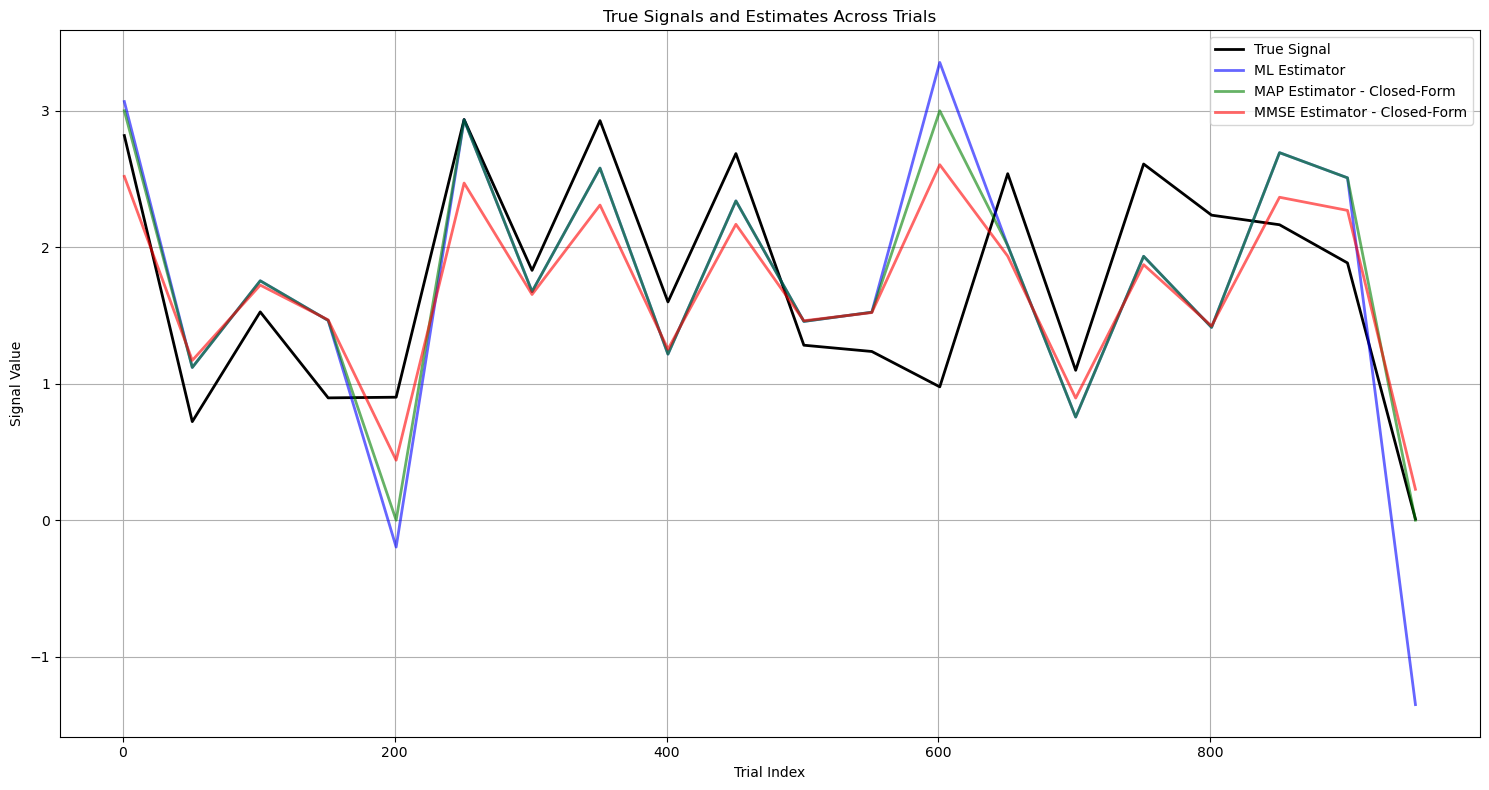

In [29]:
# Additional Plot: True Signals vs Selected Estimators with Trial Index on X-axis
# To visualize how estimates evolve over trials, we can plot the estimators against trial index.

# To make the plot readable, especially with huge trials, we'll plot a subset, e.g., every k-th trial.
subset_indices = np.arange(0, num_trials, 50)
subset_trials = subset_indices + 1  # Trial indices starting from 1

plt.figure(figsize=(15, 8))
plt.plot(subset_trials, true_signals[subset_indices], 
         label='True Signal', color='black', linewidth=2)
plt.plot(subset_trials, ml_estimates[subset_indices], 
         label='ML Estimator', color='blue', alpha=0.6, linewidth=2)
plt.plot(subset_trials, map_estimates_closed_form[subset_indices], 
         label='MAP Estimator - Closed-Form', color='green', alpha=0.6, linewidth=2)
plt.plot(subset_trials, mmse_estimates_closed[subset_indices], 
         label='MMSE Estimator - Closed-Form', color='red', alpha=0.6, linewidth=2)
plt.title('True Signals and Estimates Across Trials')
plt.xlabel('Trial Index')
plt.ylabel('Signal Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

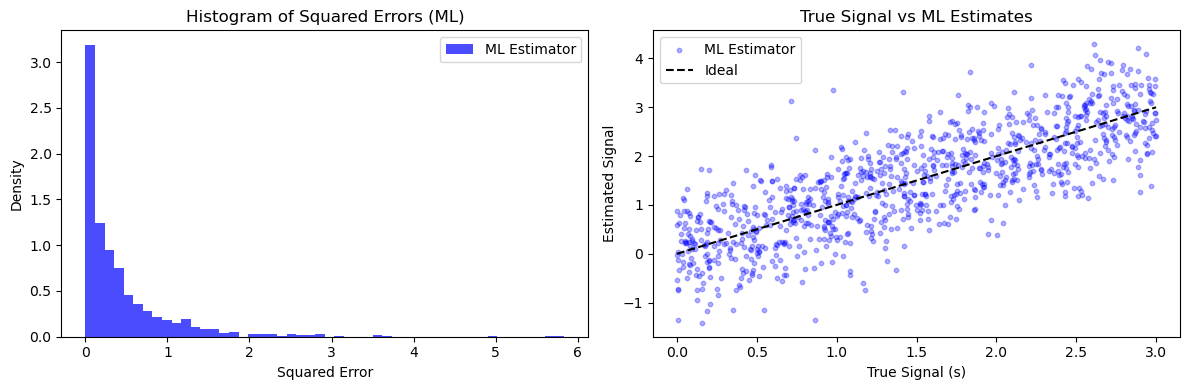

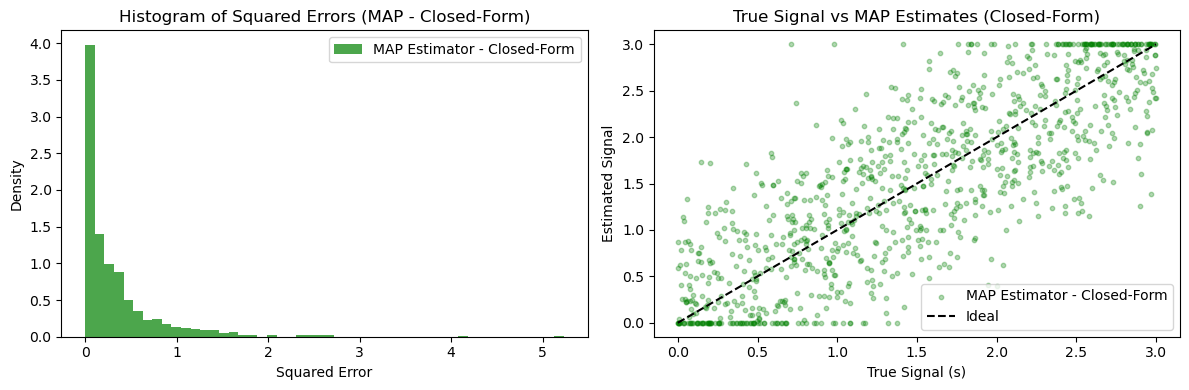

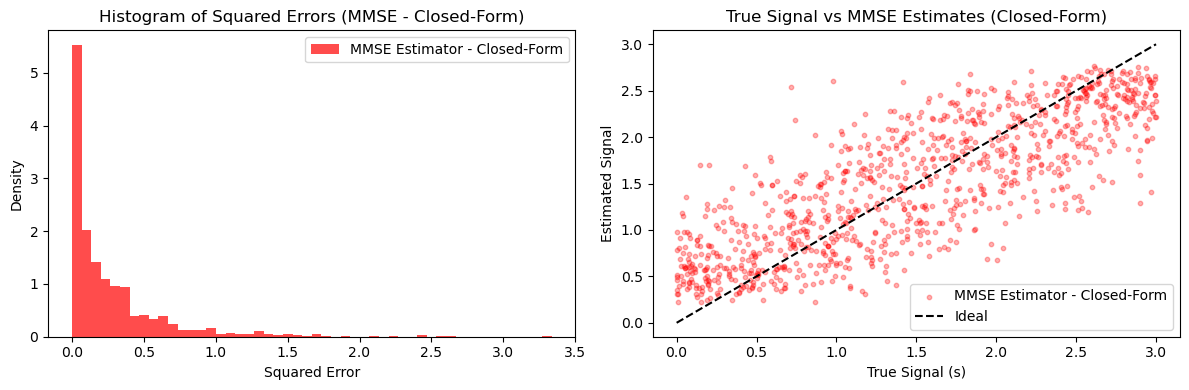

In [30]:
# Plotting Histograms of Squared Errors and True Signal vs Estimates in pairs

# Pair 1: ML Estimator
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(ml_errors, bins=50, alpha=0.7, label='ML Estimator', color='blue', density=True)
plt.title('Histogram of Squared Errors (ML)')
plt.xlabel('Squared Error')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(true_signals, ml_estimates, alpha=0.3, label='ML Estimator', color='blue', s=10)
plt.plot([0, a], [0, a], 'k--', label='Ideal')
plt.title('True Signal vs ML Estimates')
plt.xlabel('True Signal (s)')
plt.ylabel('Estimated Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Pair 2: MAP Estimator - Closed-Form
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(map_errors_proj, bins=50, alpha=0.7, label='MAP Estimator - Closed-Form', color='green', density=True)
plt.title('Histogram of Squared Errors (MAP - Closed-Form)')
plt.xlabel('Squared Error')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(true_signals, map_estimates_closed_form, alpha=0.3, label='MAP Estimator - Closed-Form', color='green', s=10)
plt.plot([0, a], [0, a], 'k--', label='Ideal')
plt.title('True Signal vs MAP Estimates (Closed-Form)')
plt.xlabel('True Signal (s)')
plt.ylabel('Estimated Signal')
plt.legend()

plt.tight_layout()
plt.show()

# Pair 3: MMSE Estimator - Closed-Form
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(mmse_errors_closed_form, bins=50, alpha=0.7, label='MMSE Estimator - Closed-Form', color='red', density=True)
plt.title('Histogram of Squared Errors (MMSE - Closed-Form)')
plt.xlabel('Squared Error')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(true_signals, mmse_estimates_closed, alpha=0.3, label='MMSE Estimator - Closed-Form', color='red', s=10)
plt.plot([0, a], [0, a], 'k--', label='Ideal')
plt.title('True Signal vs MMSE Estimates (Closed-Form)')
plt.xlabel('True Signal (s)')
plt.ylabel('Estimated Signal')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
# To store y_bar for selected trials
selected_trials = [0, np.random.randint(0, num_trials)]  # First, random
selected_y_bars = []
selected_s_true = []

# Simulation Loop
for trial in range(num_trials):
    # Randomly choose a true signal s within (0, a)
    s = np.random.uniform(0, a)
    true_signals[trial] = s
    
    # Generate L observations with Gaussian noise
    y = s + np.random.normal(0, sigma, L)
    y_bar = np.mean(y)
    
    # ML Estimator
    s_ml = y_bar
    ml_estimates[trial] = s_ml
    
    # MAP Estimator via Closed-Form
    s_map_proj = map_estimator_closed_form(y_bar, a)
    map_estimates_closed_form[trial] = s_map_proj
    
    # MAP Estimator via Numerical Root-Finding
    s_map_num = map_estimator_numerical(y_bar, L, sigma, a)
    map_estimates_numerical[trial] = s_map_num
    
    # MMSE Estimator via Numerical Integration
    s_mmse_num = mmse_estimator_numerical(y_bar, L, sigma, a)
    mmse_estimates_numerical[trial] = s_mmse_num
    
    # MMSE Estimator via Closed-Form Expression
    s_mmse_closed = mmse_estimator_closed_form(y_bar, L, sigma, a)
    mmse_estimates_closed[trial] = s_mmse_closed
    
    # Store data for selected trials
    if trial in selected_trials:
        selected_y_bars.append(y_bar)
        selected_s_true.append(s)


# To make the plot readable, especially with huge trials, we'll plot a subset, e.g., every k-th trial.
subset_indices = np.arange(0, num_trials, 10)
subset_trials = subset_indices + 1  # Trial indices starting from 1


# Plotting PDFs for Selected Trials
for idx, trial in enumerate(selected_trials):
    s_true = selected_s_true[idx]
    y_bar = selected_y_bars[idx]
    
    # Define s range for plotting
    s_values = np.linspace(0, a, 500)
    
    # Prior p(s): Uniform distribution
    p_s = np.ones_like(s_values) / a  # Uniform on [0,a]
    
    # Likelihood p(y | s): Gaussian centered at y_bar with variance sigma^2 / L
    # Since y_bar is the sample mean of L observations, the likelihood of y_bar given s is N(s, sigma^2 / L)
    p_y_given_s = norm.pdf(y_bar, loc=s_values, scale=sigma / np.sqrt(L))
    
    # Posterior p(s | y): p(y | s) * p(s) normalized
    p_s_given_y = p_y_given_s * p_s
    p_s_given_y /= np.trapz(p_s_given_y, s_values)  # Normalize
    
    # Estimators
    s_ml = ml_estimates[trial]
    s_map = map_estimates_closed_form[trial]
    s_mmse = mmse_estimates_closed[trial]


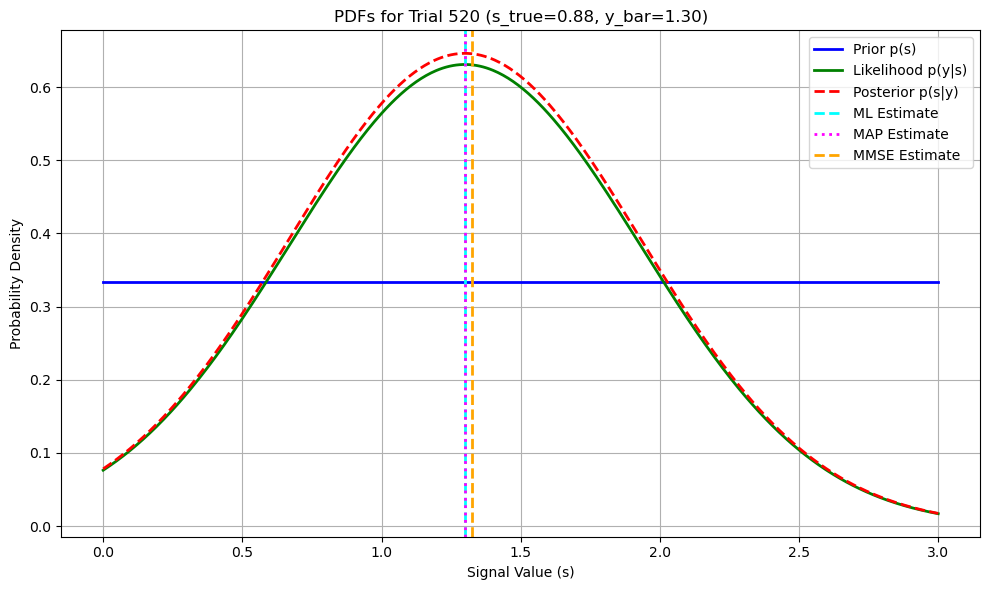

In [32]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(s_values, p_s, label='Prior p(s)', color='blue', linewidth=2)
plt.plot(s_values, p_y_given_s, label='Likelihood p(y|s)', color='green', linewidth=2, linestyle='-')  
plt.plot(s_values, p_s_given_y, label='Posterior p(s|y)', color='red', linewidth=2, linestyle='--')

# Mark estimators on the posterior
plt.axvline(s_ml, color='cyan', linestyle='--', linewidth=2, label='ML Estimate')
plt.axvline(s_map, color='magenta', linestyle=':', linewidth=2, label='MAP Estimate')
plt.axvline(s_mmse, color='orange', linestyle='--', linewidth=2, label='MMSE Estimate')

plt.title(f'PDFs for Trial {trial + 1} (s_true={s_true:.2f}, y_bar={y_bar:.2f})')
plt.xlabel('Signal Value (s)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()